# Scrape and Clean Wind Exchange Data

In [783]:
pwd

'/Users/kelly/metis_v3/Project_2'

In [782]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [483]:
#Energy.gov
#Office of Energy Efficiency & Renewable Energy

url = 'https://windexchange.energy.gov/states'

In [484]:
import requests

In [485]:
#Request from Wind Exchange website

response = requests.get(url)

In [486]:
#Check response code for failure

response.status_code

200

In [487]:
page = response.text

In [488]:
from bs4 import BeautifulSoup

In [489]:
soup = BeautifulSoup(page,"lxml")

In [490]:
print(soup)

<!DOCTYPE html>
<html lang="en-US">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<title>WINDExchange: Wind Energy State Information</title>
<link href="https://fonts.googleapis.com/css?family=Karla:400,400i,700,700i" rel="stylesheet"/>
<link data-turbolinks-track="true" href="/assets/application-aa43e84800e59c674c3d698c5920372379cbeff08b4b58d779d5aaef3242f3dc.css" media="all" rel="stylesheet"/>
<script data-turbolinks-track="true" src="/assets/application-3ffd3878d1e4cc7354b029b03a30b15af35a09ba547b59395dcc650a19979fe3.js"></script>
</head>
<body>
<header class="hidden-print" id="banner" role="banner">
<div class="banner-eere banner-inverse">
<div class="container">
<div class="row">
<div class="col-sm-7">
<img alt="ENERGY.GOV | Office of Energy Efficiency &amp;amp; Renewable Energy" class="banner-logo" src="/assets/logo-eere-84c

In [491]:
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
  <title>
   WINDExchange: Wind Energy State Information
  </title>
  <link href="https://fonts.googleapis.com/css?family=Karla:400,400i,700,700i" rel="stylesheet"/>
  <link data-turbolinks-track="true" href="/assets/application-aa43e84800e59c674c3d698c5920372379cbeff08b4b58d779d5aaef3242f3dc.css" media="all" rel="stylesheet"/>
  <script data-turbolinks-track="true" src="/assets/application-3ffd3878d1e4cc7354b029b03a30b15af35a09ba547b59395dcc650a19979fe3.js">
  </script>
 </head>
 <body>
  <header class="hidden-print" id="banner" role="banner">
   <div class="banner-eere banner-inverse">
    <div class="container">
     <div class="row">
      <div class="col-sm-7">
       <img alt="ENERGY.GOV | Office of Energy Efficiency &amp;amp; Renewable 

In [492]:
soup.find('a')

<a href="/">WINDExchange</a>

In [493]:
soup.find('<div class="col-md-2">')

In [494]:
soup.find_all(class_="col-md-2")

[<div class="col-md-2">
 <p><a href="/states/al">Alabama</a></p>
 <p><a href="/states/ak">Alaska</a></p>
 <p><a href="/states/as">American Samoa</a></p>
 <p><a href="/states/az">Arizona</a></p>
 <p><a href="/states/ar">Arkansas</a></p>
 <p><a href="/states/ca">California</a></p>
 <p><a href="/states/co">Colorado</a></p>
 <p><a href="/states/ct">Connecticut</a></p>
 <p><a href="/states/de">Delaware</a></p>
 <p><a href="/states/dc">District of Columbia</a></p>
 </div>, <div class="col-md-2">
 <p><a href="/states/fl">Florida</a></p>
 <p><a href="/states/ga">Georgia</a></p>
 <p><a href="/states/gu">Guam</a></p>
 <p><a href="/states/hi">Hawaii</a></p>
 <p><a href="/states/id">Idaho</a></p>
 <p><a href="/states/il">Illinois</a></p>
 <p><a href="/states/in">Indiana</a></p>
 <p><a href="/states/ia">Iowa</a></p>
 <p><a href="/states/ks">Kansas</a></p>
 <p><a href="/states/ky">Kentucky</a></p>
 </div>, <div class="col-md-2">
 <p><a href="/states/la">Louisiana</a></p>
 <p><a href="/states/me">Mai

In [495]:
state_list = []

for row in soup.find_all(class_="col-md-2"):
    for link in soup.find_all('a'): 
        if '/states/' in link['href']:
            #print (link['href'])
            if link['href'] not in state_list:
                state_list.append(link['href'])

print(state_list)

['/states/al', '/states/ak', '/states/as', '/states/az', '/states/ar', '/states/ca', '/states/co', '/states/ct', '/states/de', '/states/dc', '/states/fl', '/states/ga', '/states/gu', '/states/hi', '/states/id', '/states/il', '/states/in', '/states/ia', '/states/ks', '/states/ky', '/states/la', '/states/me', '/states/md', '/states/ma', '/states/mi', '/states/mn', '/states/ms', '/states/mo', '/states/mt', '/states/ne', '/states/nv', '/states/nh', '/states/nj', '/states/nm', '/states/ny', '/states/nc', '/states/nd', '/states/mp', '/states/oh', '/states/ok', '/states/or', '/states/pa', '/states/pr', '/states/ri', '/states/sc', '/states/sd', '/states/tn', '/states/tx', '/states/vi', '/states/ut', '/states/vt', '/states/va', '/states/wa', '/states/wv', '/states/wi', '/states/wy']


In [496]:
state_links = []

for state in state_list:
    state_links.append(url + state[-3:])
    print (url + state[-3:])

https://windexchange.energy.gov/states/al
https://windexchange.energy.gov/states/ak
https://windexchange.energy.gov/states/as
https://windexchange.energy.gov/states/az
https://windexchange.energy.gov/states/ar
https://windexchange.energy.gov/states/ca
https://windexchange.energy.gov/states/co
https://windexchange.energy.gov/states/ct
https://windexchange.energy.gov/states/de
https://windexchange.energy.gov/states/dc
https://windexchange.energy.gov/states/fl
https://windexchange.energy.gov/states/ga
https://windexchange.energy.gov/states/gu
https://windexchange.energy.gov/states/hi
https://windexchange.energy.gov/states/id
https://windexchange.energy.gov/states/il
https://windexchange.energy.gov/states/in
https://windexchange.energy.gov/states/ia
https://windexchange.energy.gov/states/ks
https://windexchange.energy.gov/states/ky
https://windexchange.energy.gov/states/la
https://windexchange.energy.gov/states/me
https://windexchange.energy.gov/states/md
https://windexchange.energy.gov/st

In [497]:
state_links[:5]

['https://windexchange.energy.gov/states/al',
 'https://windexchange.energy.gov/states/ak',
 'https://windexchange.energy.gov/states/as',
 'https://windexchange.energy.gov/states/az',
 'https://windexchange.energy.gov/states/ar']

In [498]:
#Use Illinois as an example

state_response = requests.get('https://windexchange.energy.gov/states/il')

In [499]:
state_page = state_response.text

In [500]:
state_soup = BeautifulSoup(state_page,"lxml")

In [501]:
#Pull out full name of state

state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]
state_name

'Illinois'

In [502]:
#get BeautifulSoup statelink

def cook_soup(link):
   
    state_response = requests.get(link)
    state_page = state_response.text
    state_soup = BeautifulSoup(state_page,"lxml")
    state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]
    

In [505]:
state_dict = {}

In [506]:
for row in state_soup.find(class_ = "col-md-5"):
    
    installed_cap = state_soup.find(text = 'Installed Capacity')
    potential_cap = state_soup.find(text = 'Potential Capacity')
    
    state_dict[installed_cap] = installed_cap.findNext().text.replace(',','').lstrip().rstrip()[:-3]
    state_dict[potential_cap] = potential_cap.findNext().text.replace(',','').lstrip().rstrip()[:-3]    

In [507]:
state_dict

{'Installed Capacity': '4332', 'Potential Capacity': '191350'}

In [508]:
def find_capacity(link):

    state_response = requests.get(link)
    state_page = state_response.text
    state_soup = BeautifulSoup(state_page,"lxml")
    state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]
    
    for row in state_soup.find(class_ = "col-md-5"):
    
        installed_cap = state_soup.find(text = 'Installed Capacity')
        potential_cap = state_soup.find(text = 'Potential Capacity')
    
        state_dict[installed_cap] = installed_cap.findNext().text.replace(',','').lstrip().rstrip()[:-3]
        state_dict[potential_cap] = potential_cap.findNext().text.replace(',','').lstrip().rstrip()[:-3]

In [509]:
state_soup.prettify()

'<!DOCTYPE html>\n<html lang="en-US">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>\n  <title>\n   WINDExchange: Wind Energy in Illinois\n  </title>\n  <link href="https://fonts.googleapis.com/css?family=Karla:400,400i,700,700i" rel="stylesheet"/>\n  <link data-turbolinks-track="true" href="/assets/application-aa43e84800e59c674c3d698c5920372379cbeff08b4b58d779d5aaef3242f3dc.css" media="all" rel="stylesheet"/>\n  <script data-turbolinks-track="true" src="/assets/application-3ffd3878d1e4cc7354b029b03a30b15af35a09ba547b59395dcc650a19979fe3.js">\n  </script>\n  <!--CRAZY EGG-->\n  <script type="text/javascript">\n   setTimeout(function(){var a=document.createElement("script");\n    var b=document.getElementsByTagName("script")[0];\n    a.src=document.location.protocol+"//script.crazyegg.com/pages/scripts/0020/4864.js?"+Math

In [545]:
#Need selenium to pick energy mix percentage out of chart

from selenium import webdriver
import os

chromedriver = "/Applications/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

driver = webdriver.Chrome(chromedriver)

In [511]:
driver.get('https://windexchange.energy.gov/states/il')

In [512]:
print(driver.page_source)

<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en-US"><head>
  <meta charset="utf-8" />
  <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
  <title>WINDExchange: Wind Energy in Illinois</title>
  <link href="https://fonts.googleapis.com/css?family=Karla:400,400i,700,700i" rel="stylesheet" />
  <link rel="stylesheet" media="all" href="/assets/application-aa43e84800e59c674c3d698c5920372379cbeff08b4b58d779d5aaef3242f3dc.css" data-turbolinks-track="true" />
  <script async="" src="https://www.google-analytics.com/analytics.js"></script><script src="https://script.crazyegg.com/pages/scripts/0020/4864.js?425446" async="" type="text/javascript"></script><script src="/assets/application-3ffd3878d1e4cc7354b029b03a30b15af35a09ba547b59395dcc650a19979fe3.js" data-turbolinks-track="true"></script>
  

  <!--CRAZY EGG-->
  <script type="text/javascript">
  

In [513]:
selenium_soup = BeautifulSoup(driver.page_source, "lxml")

In [514]:
for row in selenium_soup.find_all(class_ = 'highcharts-legend-item'):
    
    nuclear = selenium_soup.find(text = 'Nuclear')
    coal = selenium_soup.find(text = 'Coal')
    natural_gas = selenium_soup.find(text = 'Natural Gas')
    wind = selenium_soup.find(text = 'Wind')
    biomass = selenium_soup.find(text = 'Biomass')
    other_fossil = selenium_soup.find(text = 'Other Fossil')
    hydro = selenium_soup.find(text = 'Hydro')
    solar = selenium_soup.find(text = 'Solar')
    oil = selenium_soup.find(text = 'Oil')
    
    state_dict[nuclear] = nuclear.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[coal] = coal.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[natural_gas] = natural_gas.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[wind] = wind.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[biomass] = biomass.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[other_fossil] = other_fossil.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[hydro] = hydro.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[solar] = solar.findNext().text.replace(':','').replace('%','').lstrip()
    state_dict[oil] = oil.findNext().text.replace(':','').replace('%','').lstrip()


In [515]:
state_dict

{'Installed Capacity': '4332',
 'Potential Capacity': '191350',
 'Nuclear': '53.48',
 'Coal': '32.02',
 'Natural Gas': '7.74',
 'Wind': '6.22',
 'Biomass': '0.27',
 'Other Fossil': '0.14',
 'Hydro': '0.07',
 'Solar': '0.03',
 'Oil': '0.03'}

In [516]:
def find_grid_mix(link):
    
    driver.get(link)
    
    selenium_soup = BeautifulSoup(driver.page_source, "lxml")
    
    for row in selenium_soup.find_all(class_ = 'highcharts-legend-item'):
        
        nuclear = selenium_soup.find(text = 'Nuclear')
        coal = selenium_soup.find(text = 'Coal')
        natural_gas = selenium_soup.find(text = 'Natural Gas')
        wind = selenium_soup.find(text = 'Wind')
        biomass = selenium_soup.find(text = 'Biomass')
        other_fossil = selenium_soup.find(text = 'Other Fossil')
        hydro = selenium_soup.find(text = 'Hydro')
        solar = selenium_soup.find(text = 'Solar')
        oil = selenium_soup.find(text = 'Oil')
        
        try:
                state_dict[nuclear] = nuclear.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[coal] = coal.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[natural_gas] = natural_gas.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[wind] = wind.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[biomass] = biomass.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[other_fossil] = other_fossil.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[hydro] = hydro.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[solar] = solar.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass
        try:
                state_dict[oil] = oil.findNext().text.replace(':','').replace('%','').lstrip()
        except:
            pass

In [520]:
state_dict = {}

In [523]:
#Adding all the ingredients together

for link in state_links:

    def mix_soup(link):
    
        cook_soup(link) #get BeautifulSoup statelink to use in find_capacity
    
        find_capacity(link) #BeautifulSoup
    
        find_grid_mix(link) #Selenium

In [524]:
state_names = []
#def find_name():
    
for link in state_links:
    
    def find_name(link):

        state_response = requests.get(link)
        state_page = state_response.text
        state_soup = BeautifulSoup(state_page,"lxml")
        state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]
        state_names.append(state_name)

In [525]:
state_dict = {}

In [526]:
link = 'https://windexchange.energy.gov/states/ky'

In [527]:
new_dict = {}

for link in state_links:
#find_name(link)    
    state_response = requests.get(link)
    state_page = state_response.text
    state_soup = BeautifulSoup(state_page,"lxml")
    state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]

    mix_soup(link)
    new_dict[state_name] = state_dict

In [528]:
new_dict

{'Alabama': {'Installed Capacity': '1489',
  'Potential Capacity': '472418',
  'Nuclear': '14.79',
  'Coal': '86.41',
  'Natural Gas': '1.70',
  'Biomass': '2.51',
  'Hydro': '2.23',
  'Solar': '0.05',
  'Oil': '0.09',
  'Wind': '9.47',
  'Other Fossil': '0.10'},
 'Alaska': {'Installed Capacity': '1489',
  'Potential Capacity': '472418',
  'Nuclear': '14.79',
  'Coal': '86.41',
  'Natural Gas': '1.70',
  'Biomass': '2.51',
  'Hydro': '2.23',
  'Solar': '0.05',
  'Oil': '0.09',
  'Wind': '9.47',
  'Other Fossil': '0.10'},
 'American Samoa': {'Installed Capacity': '1489',
  'Potential Capacity': '472418',
  'Nuclear': '14.79',
  'Coal': '86.41',
  'Natural Gas': '1.70',
  'Biomass': '2.51',
  'Hydro': '2.23',
  'Solar': '0.05',
  'Oil': '0.09',
  'Wind': '9.47',
  'Other Fossil': '0.10'},
 'Arizona': {'Installed Capacity': '1489',
  'Potential Capacity': '472418',
  'Nuclear': '14.79',
  'Coal': '86.41',
  'Natural Gas': '1.70',
  'Biomass': '2.51',
  'Hydro': '2.23',
  'Solar': '0.05',


In [546]:
new_dict2 = {}

for link in state_links:
    
    state_dict = {}
    
    state_response = requests.get(link)
    state_page = state_response.text
    state_soup = BeautifulSoup(state_page,"lxml")
    state_name = state_soup.find(class_ = "col-sm-12 content-body").find('h1').text[15:]

    find_capacity(link)
    find_grid_mix(link)
    new_dict2[state_name] = state_dict

In [547]:
new_dict2

{'Alabama': {'Installed Capacity': '0',
  'Potential Capacity': '142886',
  'Nuclear': '30.64',
  'Coal': '22.60',
  'Natural Gas': '37.54',
  'Biomass': '2.43',
  'Hydro': '6.61',
  'Solar': '0.15',
  'Oil': '0.03'},
 'Alaska': {'Installed Capacity': '62',
  'Potential Capacity': 'no d',
  'Coal': '9.35',
  'Natural Gas': '42.56',
  'Wind': '2.74',
  'Biomass': '0.71',
  'Hydro': '29.82',
  'Oil': '14.87'},
 'American Samoa': {'Installed Capacity': '0', 'Potential Capacity': 'no d'},
 'Arizona': {'Installed Capacity': '268',
  'Potential Capacity': '474966',
  'Nuclear': '30.56',
  'Coal': '29.67',
  'Natural Gas': '27.92',
  'Wind': '0.56',
  'Biomass': '0.22',
  'Hydro': '6.54',
  'Solar': '4.48',
  'Oil': '0.05'},
 'Arkansas': {'Installed Capacity': '0',
  'Potential Capacity': '162330',
  'Nuclear': '20.43',
  'Coal': '42.32',
  'Natural Gas': '28.32',
  'Biomass': '2.40',
  'Hydro': '6.39',
  'Solar': '0.05',
  'Oil': '0.08'},
 'California': {'Installed Capacity': '5686',
  'Pote

In [548]:
new_dict2.keys()

dict_keys(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'])

In [551]:
#Check pulling correct / unique values
#new_dict2.values()

In [553]:
import pandas as pd

In [554]:
#Create DataFrame from Dictionary

pd.DataFrame(new_dict2)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Biomass,2.43,0.71,NaN,0.22,2.40,2.89,0.31,2.49,2.27,70.53,...,1.19,0.34,NaN,0.20,6.44,4.32,1.77,NaN,2.51,NaN
Coal,22.60,9.35,NaN,29.67,42.32,0.14,53.84,0.58,22.80,NaN,...,35.49,29.94,NaN,71.88,NaN,11.56,4.77,95.76,55.01,86.41
Hydro,6.61,29.82,NaN,6.54,6.39,21.06,3.11,0.77,NaN,NaN,...,8.87,0.35,NaN,2.23,16.72,0.36,71.95,1.95,4.36,2.23
Installed Capacity,0,62,0,268,0,5686,3106,5,2,0,...,29,22799,0,391,149,0,3075,686,746,1489
Natural Gas,37.54,42.56,NaN,27.92,28.32,42.95,23.29,45.66,74.14,29.47,...,13.29,45.23,NaN,16.08,0.04,49.98,7.89,0.33,20.64,1.70
Nuclear,30.64,NaN,NaN,30.56,20.43,8.75,NaN,48.39,NaN,NaN,...,40.74,8.58,NaN,NaN,71.97,32.68,7.06,NaN,14.79,NaN
Oil,0.03,14.87,NaN,0.05,0.08,0.02,0.02,0.34,0.59,NaN,...,0.16,0.04,NaN,0.11,0.08,0.47,0.02,0.20,0.22,0.09
Other Fossil,NaN,NaN,NaN,NaN,NaN,0.41,0.10,1.60,NaN,NaN,...,0.03,0.12,NaN,0.33,NaN,0.23,0.05,NaN,0.08,0.10
Potential Capacity,142886,no d,no d,474966,162330,303375,395377,1679,755,no d,...,115857,1347992,no d,277745,22191,89120,174224,69098,114314,472418
Solar,0.15,NaN,NaN,4.48,0.05,11.29,1.72,0.17,0.13,NaN,...,0.19,0.47,NaN,5.38,0.33,0.40,NaN,NaN,0.05,NaN


In [555]:
wind_df = pd.DataFrame(new_dict2)

In [563]:
wind_df.index

Index([Biomass, Coal, Hydro, Installed Capacity, Natural Gas, Nuclear, Oil,
       Other Fossil, Potential Capacity, Solar, Wind],
      dtype='object')

In [626]:
wind_df.reset_index().T

,0,1,2,3,4,5,6,7,8,9,10
index,Biomass,Coal,Hydro,Installed Capacity,Natural Gas,Nuclear,Oil,Other Fossil,Potential Capacity,Solar,Wind
Alabama,2.43,22.60,6.61,0,37.54,30.64,0.03,NaN,142886,0.15,NaN
Alaska,0.71,9.35,29.82,62,42.56,NaN,14.87,NaN,no d,NaN,2.74
American Samoa,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,no d,NaN,NaN
Arizona,0.22,29.67,6.54,268,27.92,30.56,0.05,NaN,474966,4.48,0.56
Arkansas,2.40,42.32,6.39,0,28.32,20.43,0.08,NaN,162330,0.05,NaN
California,2.89,0.14,21.06,5686,42.95,8.75,0.02,0.41,303375,11.29,6.83
Colorado,0.31,53.84,3.11,3106,23.29,NaN,0.02,0.10,395377,1.72,17.61
Connecticut,2.49,0.58,0.77,5,45.66,48.39,0.34,1.60,1679,0.17,NaN
Delaware,2.27,22.80,NaN,2,74.14,NaN,0.59,NaN,755,0.13,0.08


In [629]:
wind_transposed = wind_df.reset_index().T

In [630]:
wind_transposed.head()

,0,1,2,3,4,5,6,7,8,9,10
index,Biomass,Coal,Hydro,Installed Capacity,Natural Gas,Nuclear,Oil,Other Fossil,Potential Capacity,Solar,Wind
Alabama,2.43,22.60,6.61,0,37.54,30.64,0.03,NaN,142886,0.15,NaN
Alaska,0.71,9.35,29.82,62,42.56,NaN,14.87,NaN,no d,NaN,2.74
American Samoa,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,no d,NaN,NaN
Arizona,0.22,29.67,6.54,268,27.92,30.56,0.05,NaN,474966,4.48,0.56


In [635]:
wind_transposed[:0] = wind_transposed[:1]

In [650]:
wind_transposed.rename(columns = {0:'Biomass',
                                  1:'Coal',
                                  2:'Hydro',
                                  3:'Installed Capacity',
                                  4:'Natural Gas',
                                  5:'Nuclear',
                                  6:'Oil',
                                  7:'Other Fossil',
                                  8:'Potential Capacity',
                                  9:'Solar',
                                  10:'Wind'}, inplace = True)

In [654]:
wind_transposed = wind_transposed[1:]

In [655]:
wind_transposed.head()

,Biomass,Coal,Hydro,Installed Capacity,Natural Gas,Nuclear,Oil,Other Fossil,Potential Capacity,Solar,Wind
Alabama,2.43,22.60,6.61,0,37.54,30.64,0.03,NaN,142886,0.15,NaN
Alaska,0.71,9.35,29.82,62,42.56,NaN,14.87,NaN,no d,NaN,2.74
American Samoa,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,no d,NaN,NaN
Arizona,0.22,29.67,6.54,268,27.92,30.56,0.05,NaN,474966,4.48,0.56
Arkansas,2.40,42.32,6.39,0,28.32,20.43,0.08,NaN,162330,0.05,NaN


In [657]:
import matplotlib.pyplot as plt

In [685]:
wind_transposed.replace('no d', 0, inplace = True)

In [688]:
wind_transposed = wind_transposed.astype(float)

In [689]:
wind_transposed.dtypes

Biomass               float64
Coal                  float64
Hydro                 float64
Installed Capacity    float64
Natural Gas           float64
Nuclear               float64
Oil                   float64
Other Fossil          float64
Potential Capacity    float64
Solar                 float64
Wind                  float64
dtype: object

In [691]:
wind_transposed.sum()

Biomass                    181.37
Coal                      1555.19
Hydro                      493.22
Installed Capacity       89379.00
Natural Gas               1427.44
Nuclear                    887.80
Oil                        103.89
Other Fossil                30.40
Potential Capacity    10640080.00
Solar                       48.19
Wind                       354.67
dtype: float64

In [692]:
wind_transposed.head()

,Biomass,Coal,Hydro,Installed Capacity,Natural Gas,Nuclear,Oil,Other Fossil,Potential Capacity,Solar,Wind
Alabama,2.43,22.60,6.61,0.0,37.54,30.64,0.03,NaN,142886.0,0.15,NaN
Alaska,0.71,9.35,29.82,62.0,42.56,NaN,14.87,NaN,0.0,NaN,2.74
American Samoa,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
Arizona,0.22,29.67,6.54,268.0,27.92,30.56,0.05,NaN,474966.0,4.48,0.56
Arkansas,2.40,42.32,6.39,0.0,28.32,20.43,0.08,NaN,162330.0,0.05,NaN


In [694]:
grid_mix_list = ['Biomass', 'Coal', 'Hydro', 'Natural Gas', 'Nuclear', 'Oil', 'Other Fossil', 'Solar', 'Wind']
capacity = ['Installed Capacity', 'Potential Capacity']

In [696]:
grid_mix = wind_transposed.filter(items = grid_mix_list)

In [713]:
grid_mix.sum()

Biomass          181.37
Coal            1555.19
Hydro            493.22
Natural Gas     1427.44
Nuclear          887.80
Oil              103.89
Other Fossil      30.40
Solar             48.19
Wind             354.67
dtype: float64

In [718]:
grid_mix_values = list(grid_mix.sum())

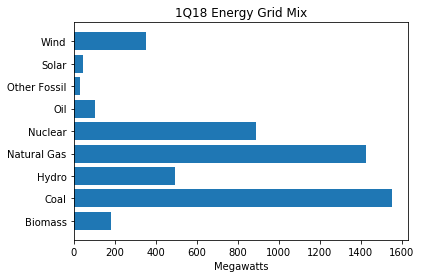

In [740]:
grid_mix
plt.barh(np.arange(len(grid_mix_list)),grid_mix_values);
plt.yticks(np.arange(9), (grid_mix_list));
plt.xlabel('Megawatts')
plt.yticks()
plt.title('1Q18 Energy Grid Mix');

In [742]:
capacity_totals = wind_transposed.filter(items = capacity).sum()

In [754]:
capacity_totals

Installed Capacity       89379.0
Potential Capacity    10640080.0
dtype: float64

In [752]:
round((capacity_totals['Installed Capacity'] / capacity_totals['Potential Capacity']),3)

0.008

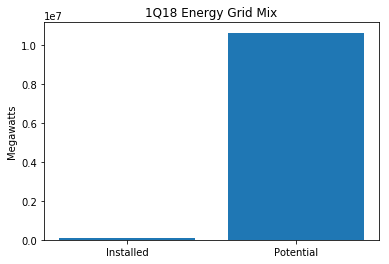

In [788]:

plt.bar([1,2],capacity_totals);
plt.ylabel('Megawatts')
plt.xticks((1,2), ('Installed', 'Potential'))
plt.title('1Q18 Energy Grid Mix');

In [762]:
wind_transposed['Installed Capacity'].count()

56

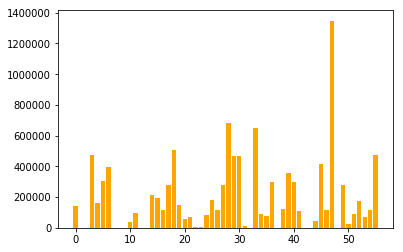

<Figure size 720x720 with 0 Axes>

In [784]:
# Scale begins at 200,000 MW

#plt.bar(np.arange(0,wind_transposed['Installed Capacity'].count()),wind_transposed['Installed Capacity'], color = 'green')
plt.bar(np.arange(0,wind_transposed['Potential Capacity'].count()),wind_transposed['Potential Capacity'], color = 'orange')
plt.figure(figsize = (10,10));

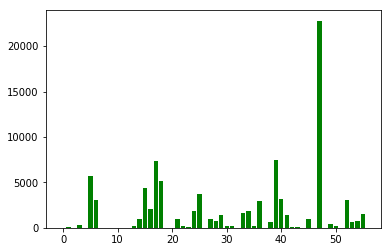

<Figure size 720x720 with 0 Axes>

In [785]:
#Scale of 0 - 20,000 MW

plt.bar(np.arange(0,wind_transposed['Installed Capacity'].count()),wind_transposed['Installed Capacity'], color = 'green')
#plt.bar(np.arange(0,wind_transposed['Potential Capacity'].count()),wind_transposed['Potential Capacity'], color = 'orange')
plt.figure(figsize = (10,10));